In [1]:
# import our packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data =  pd.read_csv('/content/sample_data/2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')
data.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [3]:
data.shape

(5000, 7)

In [14]:
# Verify Average Order Value is $3145.13, Display Median Order Value
#The simple answer that I believe they are looking for here is Median Order Value. Its a well known technique in data analysis to use the median as the "average" function when there are outliers present in the data. However, before we conclude the simple answer, one must always do their due dillegence. In our case, we will first confirm our statistics, then visualize the distribution of order size to look for outliers.

print('Average Order Value:', data['order_amount'].mean(), ',',
      'Median Order Value:', data['order_amount'].median())

Average Order Value: 3145.128 , Median Order Value: 284.0


,total_items
1,1830
2,1832
3,941
4,293
5,77
6,9
8,1
2000,17


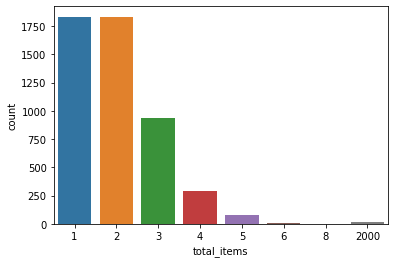

In [5]:
# View the distribution of order sizes.
sns.countplot(x='total_items', data=data)
pd.DataFrame(data['total_items'].value_counts().sort_index())

Aha! Our intuition is correct. We have 17 orders (0.34% of the total orders) that are massive, and thus throwing off our mean calculations.

The next step here is to just split our mean calculations into "small orders" (<10 in this case), and "large orders" (orders of size 2000). Interestingly, we still run into issues with this approach:

In [6]:
# Small and large order averages. 
data[data['total_items'] < 10]['order_amount'].mean(), data[data['total_items'] == 2000]['order_amount'].mean()

(754.0919125025085, 704000.0)

The Small Order Average is 754.09, yet the Total Median Order Value is 284.
This should raise some eyebrows, why such a large discrepancy?

So next we ask what is the average price to a pair of shoes in our dataset, and we will finally uncover the underlying deception.

In [7]:
# Create a price per pair of shoes for every order.
data['price_per_item'] = data['order_amount']/data['total_items']

In [8]:
pd.DataFrame(data['price_per_item'].describe())

,price_per_item
count,5000.000000
mean,387.742800
std,2441.963725
min,90.000000
25%,133.000000
50%,153.000000
75%,169.000000
max,25725.000000


Who is charging $25,725 for a pair of shoes? Let us see.

In [9]:
pd.DataFrame(data['price_per_item'].value_counts().sort_index())

,price_per_item
90.0,42
94.0,55
101.0,42
111.0,40
112.0,124
114.0,59
116.0,58
117.0,77
118.0,118
122.0,50


In [10]:
normal_orders = data[data['price_per_item'] < 400 ]
fraudulent_orders = data[data['price_per_item'] == 25725]

And our key insight here, all shoes are below 400, except for 46 orders which all share an outragous price tag of 25,725!

Thus, we ought to examine the heavily overpriced orders to see if there are any patterns.

In [11]:
fraudulent_orders

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,price_per_item
160,161,78,990,25725,1,credit_card,2017-03-12 5:56:57,25725.0
490,491,78,936,51450,2,debit,2017-03-26 17:08:19,25725.0
493,494,78,983,51450,2,cash,2017-03-16 21:39:35,25725.0
511,512,78,967,51450,2,cash,2017-03-09 7:23:14,25725.0
617,618,78,760,51450,2,cash,2017-03-18 11:18:42,25725.0
691,692,78,878,154350,6,debit,2017-03-27 22:51:43,25725.0
1056,1057,78,800,25725,1,debit,2017-03-15 10:16:45,25725.0
1193,1194,78,944,25725,1,debit,2017-03-16 16:38:26,25725.0
1204,1205,78,970,25725,1,credit_card,2017-03-17 22:32:21,25725.0
1259,1260,78,775,77175,3,credit_card,2017-03-27 9:27:20,25725.0


In [15]:
# Shop #78 has 0 orders under $400, and 46 orders priced at $25,725 per pair of shoes!!
len(normal_orders[normal_orders['shop_id']==78]), len(fraudulent_orders[fraudulent_orders['shop_id']==78])

(0, 46)

And the pattern is clear as day, Shop_id = 78 is the only culprit of the fraud!

In [16]:
# So the final steps of our analysis is to filter out the overpriced orders from shop 78, and filter out the outliers in order size to get a decent handle of Average Order Volume.
new_data = data[data['shop_id'] != 78]
new_data_small_orders = new_data[new_data['total_items'] != 2000]
new_data_large_orders = new_data[new_data['total_items'] == 2000]

In [17]:
# QED.
new_data_small_orders['order_amount'].mean(), new_data['order_amount'].median()

(302.58051448247926, 284.0)